In [1]:
%load_ext autoreload
%autoreload 2

%cd ..

/Users/rubenbroekx/Documents/Projects/agoro-field-boundary-detector


# Google Earth Engine

Guiding notebook to show how to work with Google Earth Engine's Python API. More specifically, we'll demonstrate how to work with the National Agriculture Imagery Program (NAIP) data collection wrapper, created under `src/agoro_field_boundary_detection/google_earth_engine`.

In [1]:
import ee
import folium

from pathlib import Path
from IPython.display import Image 

from src.agoro_field_boundary_detector.google_earth_engine import (
    start_session, 
    create_bounding_box, 
    to_polygon,
    NaipCollection,
    create_map,
    show_point,
    show_polygon,
)

ModuleNotFoundError: No module named 'src'

## Create GEE Session

In order to communicate with GEE, we should create and initialise a session first. Note, in order to do this step, you should've [created an account](https://earthengine.google.com/signup/) on GEE first.

In [3]:
start_session()

Enter verification code: 4/1AY0e-g4Bjw7OBUmt_agAEz0fK28mPeWwhomFzUed-688du_uO_LQaPuN44g

Successfully saved authorization token.


## Load Dataset

Load in the NAIP dataset for a specified region. This happens via the following steps:
1. Specify a coordinate (latitude, longitude) to inspect.
2. Create a bounding box around this coordinate. The `create_bounding_box` function will create the bounding-box coordinates `(lat,lng)`, where the `to_polygon` function transforms these coordinates to an Earth Engine `Polygon`.
3. Load in the NAIP dataset with images covering this region. By default, we'll use the most recent images. However, it is possible to modify the `startdate` and `enddate` parameters of the collection.

In [4]:
# Specify the coordinate
LAT = 40.7278
LNG = -73.9958

In [5]:
# Create bounding box
region = to_polygon(create_bounding_box(
    lat=LAT,
    lng=LNG,
))

In [6]:
# Load in the collection
collection = NaipCollection(
    region=region,
)
print(f"Number of images captured:", collection.get_size())

Number of images captured: 5


## Visualise Data

Create a visualisation of the fetched data. To make this possible, we'll use the `Folium` package.

In [7]:
# Create a map visualisation
mp = create_map(
    (LAT,LNG), 
    zoom=14,
)

# Display dataset
mp.add_ee_layer(
    collection.get_image(),
    collection.get_vis_params(),
    'NAIP',
)

# Display supplementary information
mp = show_polygon(mp, region)
mp = show_point(mp, ee.Geometry.Point(LNG,LAT))

# Show map
mp.add_child(folium.LayerControl())
display(mp)

## Export Images

It is possible to export the images from the data collection as well, this by using the collection's `export_as_png` call.

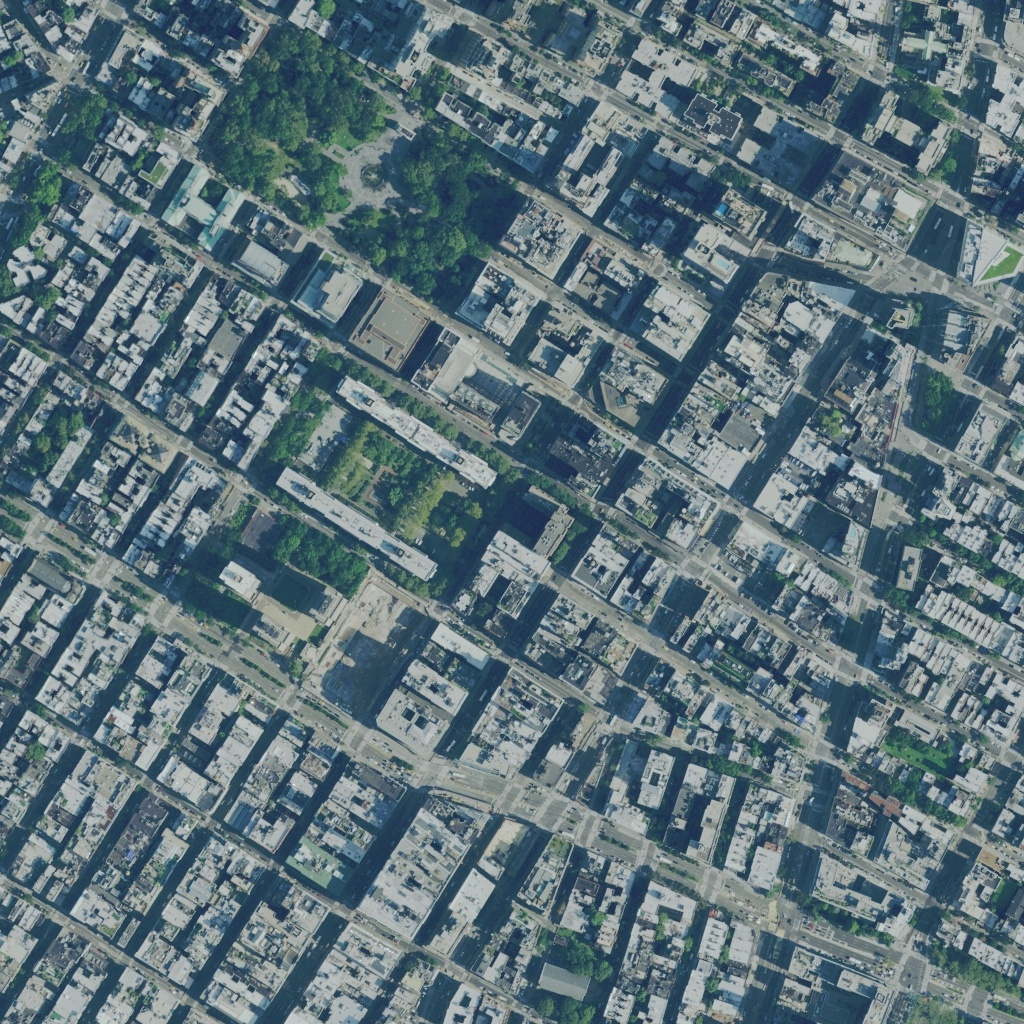

In [8]:
filename = Path.cwd() / 'notebooks/example.png'
collection.export_as_png(
    file_name=filename,
)

img = Image(filename)
display(img)